# Approaches:
    1.Load data & libraries.
    2.Data Preparation & transformation.
    3.Visualization.
    4.Analysis:
        -Uni-variate
        -Bi-variate(correlation and chi-square)
        -Muti-variate:
            1.supervised:
                ! Regression.
                ! Classification.
            2.Unsupervised:
                !Dimensionality Reduction.
                ! Clustering.

# LOGISTIC REGRESSION IS CLASSIFICATION PROBLEM:

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [3]:
train = pd.read_csv("C:/Users/DELL/Downloads/train_ctrUa4K (4).csv")
test = pd.read_csv("C:/Users/DELL/Downloads/test_lAUu6dG (4).csv")

In [4]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


# EDA:

In [5]:
train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


<Axes: xlabel='ApplicantIncome', ylabel='Density'>

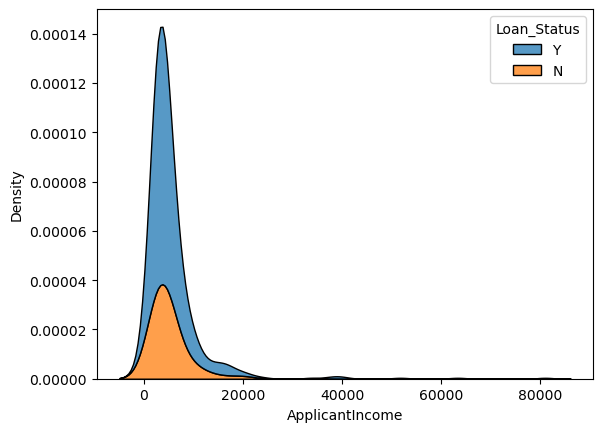

In [6]:
sns.kdeplot(data=train, x="ApplicantIncome", hue="Loan_Status", multiple="stack")

<Axes: xlabel='CoapplicantIncome', ylabel='Density'>

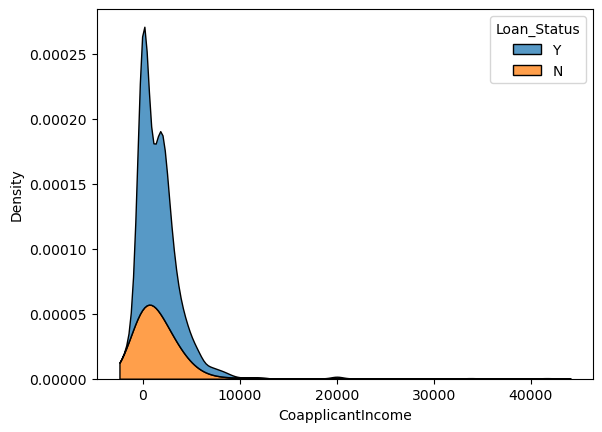

In [7]:
sns.kdeplot(data=train, x="CoapplicantIncome", hue="Loan_Status", multiple="stack")

<Axes: xlabel='LoanAmount', ylabel='Density'>

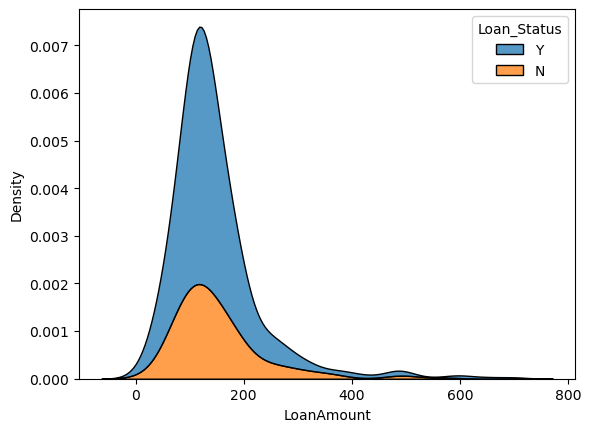

In [8]:
sns.kdeplot(data=train, x="LoanAmount", hue="Loan_Status", multiple="stack")

<Axes: xlabel='Loan_Amount_Term', ylabel='Density'>

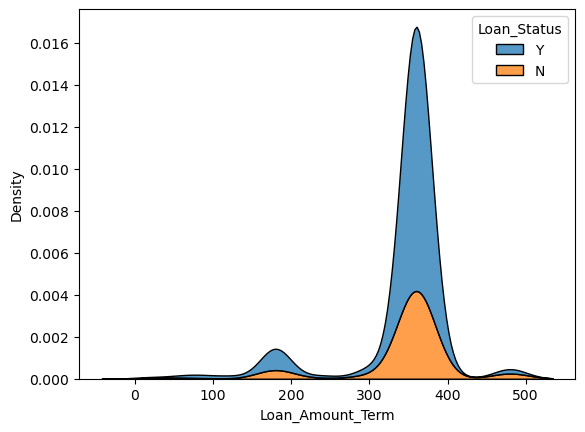

In [9]:
sns.kdeplot(data=train, x="Loan_Amount_Term", hue="Loan_Status", multiple="stack")

<Axes: ylabel='Loan_Status'>

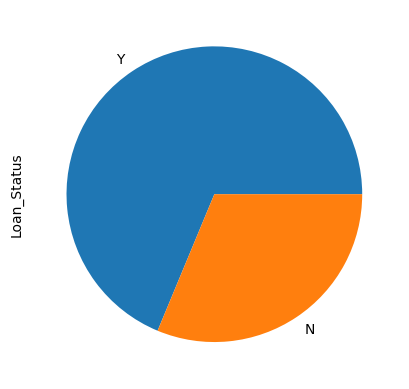

In [10]:
train['Loan_Status'].value_counts().plot(kind='pie')

C:\Users\DELL\AppData\Local\Temp\ipykernel_24416\3160945300.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train.corr(),annot = True)


<Axes: >

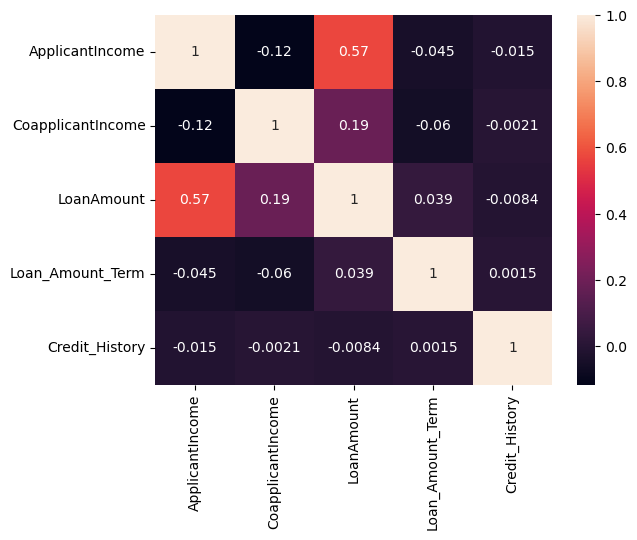

In [11]:
sns.heatmap(train.corr(),annot = True)

In [12]:
from scipy.stats import chi2_contingency
def chi_sq(var1, var2):
  """Check for Categorical Variable Relationship"""
  table = pd.crosstab(var1, var2)
  _,p,_,_ = chi2_contingency(table)
  if p <= 0.05:
    print('Accept the Alternate Hypothesis', round(p,2))
  else:
    print('Failed to reject the null Hypothesis', round(p,2))
  return table

In [13]:
pd.crosstab(train['Gender'], train['Loan_Status'])

Loan_Status,N,Y
Gender,,
Female,37,75
Male,150,339


In [14]:
chi_sq(train['Gender'], train['Loan_Status'])

Failed to reject the null Hypothesis 0.71


Loan_Status,N,Y
Gender,,
Female,37,75
Male,150,339


In [15]:
chi_sq(train['Married'], train['Loan_Status'])

Accept the Alternate Hypothesis 0.03


Loan_Status,N,Y
Married,,
No,79,134
Yes,113,285


In [16]:
chi_sq(train['Self_Employed'], train['Loan_Status'])

Failed to reject the null Hypothesis 1.0


Loan_Status,N,Y
Self_Employed,,
No,157,343
Yes,26,56


In [17]:
chi_sq(train['Education'], train['Loan_Status'])

Accept the Alternate Hypothesis 0.04


Loan_Status,N,Y
Education,,
Graduate,140,340
Not Graduate,52,82


In [18]:
chi_sq(train['Property_Area'], train['Loan_Status'])

Accept the Alternate Hypothesis 0.0


Loan_Status,N,Y
Property_Area,,
Rural,69,110
Semiurban,54,179
Urban,69,133


# Data Preparation:

In [19]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [20]:
def data_prep(data):
  #Imputation of missing values
  data['Gender'] = np.where(data['Gender'].isna(), data['Gender'].mode(dropna = True)[0], data['Gender'])
  data['Married'] = np.where(data['Married'].isna(), data['Married'].mode(dropna = True)[0], data['Married'])
  data['Dependents'] = np.where(data['Dependents'].isna(), data['Dependents'].mode(dropna = True), data['Dependents'])
  data['Dependents'].replace('3+', 3, inplace = True)
  data['Self_Employed'] = np.where(data['Self_Employed'].isna(), data['Self_Employed'].mode(dropna = True), data['Self_Employed'])
  data['LoanAmount'] = np.where(data['LoanAmount'].isna(), data['LoanAmount'].median(skipna = True), data['LoanAmount'])
  data['Loan_Amount_Term'] = np.where(data['Loan_Amount_Term'].isna(), data['Loan_Amount_Term'].median(skipna = True), data['Loan_Amount_Term'])
  data['Credit_History'] = np.where(data['Credit_History'].isna(), data['Credit_History'].mode(dropna = True), data['Credit_History'])
  data['Credit_History'] = data['Credit_History'].astype('int')
  data['Dependents'] = data['Dependents'].astype('int')
  return data

In [21]:
#To avoid hard coding as like above we use this code:
for i in train.columns:
  if train[i].dtypes == 'object':
    train[i] = np.where(train[i].isna(), train[i].mode(dropna = True)[0], train[i])
  else:
    train[i] = np.where(train[i].isna(), train[i].median(skipna = True), train[i])

In [22]:
data_prep(train)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849.0,0.0,128.0,360.0,1,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583.0,1508.0,128.0,360.0,1,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000.0,0.0,66.0,360.0,1,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583.0,2358.0,120.0,360.0,1,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000.0,0.0,141.0,360.0,1,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900.0,0.0,71.0,360.0,1,Rural,Y
610,LP002979,Male,Yes,3,Graduate,No,4106.0,0.0,40.0,180.0,1,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072.0,240.0,253.0,360.0,1,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583.0,0.0,187.0,360.0,1,Urban,Y


In [23]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    object 
 2   Married            614 non-null    object 
 3   Dependents         614 non-null    int32  
 4   Education          614 non-null    object 
 5   Self_Employed      614 non-null    object 
 6   ApplicantIncome    614 non-null    float64
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    int32  
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int32(2), object(7)
memory usage: 57.7+ KB


# Encode the discrete varibale:

In [24]:
from sklearn.preprocessing import LabelEncoder

In [25]:
def encode(data):
    le = LabelEncoder()
    for i in data.columns:
        if data[i].dtype == 'object':
            data[i] = le.fit_transform(data[i])
    return data

In [26]:
encode(train)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,1,0,0,0,0,5849.0,0.0,128.0,360.0,1,2,1
1,1,1,1,1,0,0,4583.0,1508.0,128.0,360.0,1,0,0
2,2,1,1,0,0,1,3000.0,0.0,66.0,360.0,1,2,1
3,3,1,1,0,1,0,2583.0,2358.0,120.0,360.0,1,2,1
4,4,1,0,0,0,0,6000.0,0.0,141.0,360.0,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,609,0,0,0,0,0,2900.0,0.0,71.0,360.0,1,0,1
610,610,1,1,3,0,0,4106.0,0.0,40.0,180.0,1,0,1
611,611,1,1,1,0,0,8072.0,240.0,253.0,360.0,1,2,1
612,612,1,1,2,0,0,7583.0,0.0,187.0,360.0,1,2,1


In [27]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    int32  
 1   Gender             614 non-null    int32  
 2   Married            614 non-null    int32  
 3   Dependents         614 non-null    int32  
 4   Education          614 non-null    int32  
 5   Self_Employed      614 non-null    int32  
 6   ApplicantIncome    614 non-null    float64
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    int32  
 11  Property_Area      614 non-null    int32  
 12  Loan_Status        614 non-null    int32  
dtypes: float64(4), int32(9)
memory usage: 40.9 KB


# Splitting the Data (based on daigram)

In [28]:
x = train.drop(['Loan_ID','Loan_Status'],axis =1)
y = train['Loan_Status']

In [29]:
x.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,0,0,0,0,5849.0,0.0,128.0,360.0,1,2
1,1,1,1,0,0,4583.0,1508.0,128.0,360.0,1,0
2,1,1,0,0,1,3000.0,0.0,66.0,360.0,1,2
3,1,1,0,1,0,2583.0,2358.0,120.0,360.0,1,2
4,1,0,0,0,0,6000.0,0.0,141.0,360.0,1,2


In [30]:
y.head()

0    1
1    0
2    1
3    1
4    1
Name: Loan_Status, dtype: int32

# train test split:

In [31]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 123)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(491, 11)
(123, 11)
(491,)
(123,)


# Applying Model:

In [32]:
logreg = LogisticRegression()
logreg.fit(x_train,y_train)

LogisticRegression()

In [33]:
print(logreg.intercept_)

[0.15680035]


In [34]:
print(logreg.coef_)

[[ 6.26280336e-02  4.17076505e-01 -9.45261652e-02 -4.15246666e-01
  -1.46677104e-01 -1.41680305e-05 -3.84082818e-05 -5.50037851e-04
  -5.04705630e-03  2.93027517e+00  6.02244942e-02]]


In [35]:
x_train.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

In [36]:
proba_train = logreg.predict_proba(x_train)
proba_train
#left side is for not getting a loan, right side is for getting a loan.

array([[0.23013722, 0.76986278],
       [0.24879792, 0.75120208],
       [0.194892  , 0.805108  ],
       [0.28187954, 0.71812046],
       [0.82532734, 0.17467266],
       [0.35873762, 0.64126238],
       [0.16331794, 0.83668206],
       [0.27134785, 0.72865215],
       [0.20375319, 0.79624681],
       [0.85047273, 0.14952727],
       [0.18355802, 0.81644198],
       [0.21176388, 0.78823612],
       [0.25521841, 0.74478159],
       [0.85161927, 0.14838073],
       [0.27220569, 0.72779431],
       [0.21971522, 0.78028478],
       [0.17865241, 0.82134759],
       [0.17354975, 0.82645025],
       [0.169155  , 0.830845  ],
       [0.21458591, 0.78541409],
       [0.17796821, 0.82203179],
       [0.23620342, 0.76379658],
       [0.25256119, 0.74743881],
       [0.80091916, 0.19908084],
       [0.75270922, 0.24729078],
       [0.21975331, 0.78024669],
       [0.21479997, 0.78520003],
       [0.84758701, 0.15241299],
       [0.25985768, 0.74014232],
       [0.16742583, 0.83257417],
       [0.

In [37]:
y_hat_train = logreg.predict(x_train)
y_hat_test = logreg.predict(x_test)

In [38]:
y_hat_train

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,

# MODEL EVALUATION:

# Only going to deal with y_train, y_hat_train, y_test, y_hat_test.

In [39]:
conf_matrix_train = confusion_matrix(y_train, y_hat_train)
print(conf_matrix_train)

[[ 65  85]
 [  5 336]]


In [40]:
conf_matrix_test = confusion_matrix(y_test, y_hat_test)
print(conf_matrix_test)

[[17 25]
 [ 2 79]]


In [41]:
print("Accuracy score for train",accuracy_score(y_train, y_hat_train))

Accuracy score for train 0.8167006109979633


In [42]:
print("Accuracy score for test",accuracy_score(y_test, y_hat_test))

Accuracy score for test 0.7804878048780488


In [43]:
print(classification_report(y_test, y_hat_test))

              precision    recall  f1-score   support

           0       0.89      0.40      0.56        42
           1       0.76      0.98      0.85        81

    accuracy                           0.78       123
   macro avg       0.83      0.69      0.71       123
weighted avg       0.81      0.78      0.75       123



In [44]:
print(classification_report(y_train, y_hat_train))

              precision    recall  f1-score   support

           0       0.93      0.43      0.59       150
           1       0.80      0.99      0.88       341

    accuracy                           0.82       491
   macro avg       0.86      0.71      0.74       491
weighted avg       0.84      0.82      0.79       491



# APPLYING DECISION TREE:
    Because not ore accuracy in the logistic regression.

In [132]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit(x_train, y_train)

DecisionTreeClassifier()

Hyperparamater tune panni pakanum, sklearn decision tree pootu athula erukuratha onnu onna pootu paakanum until nalla accuracy,bias, variance vara varaikum.

In [133]:
y_hat_train_dtree = dtree.predict(x_train)
y_hat_test_dtree = dtree.predict(x_test)

In [134]:
def model_eval(actual, predict):
    conf_matrix = confusion_matrix(actual, predict)
    class_rep = classification_report(actual, predict)
    acc_score = accuracy_score(actual, predict)
    print('The Accuracy of the model is: ', round(acc_score, 2))
    print(conf_matrix)
    print(class_rep)


In [135]:
model_eval(y_train, y_hat_train_dtree)

The Accuracy of the model is:  1.0
[[150   0]
 [  0 341]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       150
           1       1.00      1.00      1.00       341

    accuracy                           1.00       491
   macro avg       1.00      1.00      1.00       491
weighted avg       1.00      1.00      1.00       491



In [136]:
model_eval(y_test, y_hat_test_dtree)

The Accuracy of the model is:  0.72
[[25 17]
 [18 63]]
              precision    recall  f1-score   support

           0       0.58      0.60      0.59        42
           1       0.79      0.78      0.78        81

    accuracy                           0.72       123
   macro avg       0.68      0.69      0.69       123
weighted avg       0.72      0.72      0.72       123



# Low bias becoz the accuracy int the train data near to one.

high variance becoz the diff bet train and test is more .
low bias and high variance == OVERFITTING.   so reduce the bias.

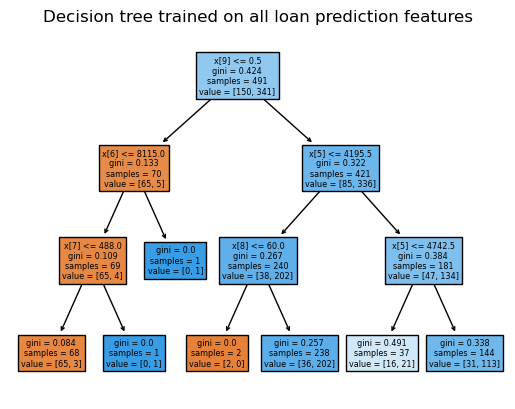

In [137]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
plt.figure()
clf = DecisionTreeClassifier(max_depth = 3).fit(x_train, y_train)
plot_tree(clf, filled=True)
plt.title("Decision tree trained on all loan prediction features")
plt.show()

In above tree x[9] means the column name according to the index number. starts from 0 to n .

# For Feature Selection:

In [138]:
pd.DataFrame({'col_name': dtree.feature_importances_}, index=x.columns).sort_values(by='col_name', ascending=False)

,col_name
Credit_History,0.304236
ApplicantIncome,0.249987
LoanAmount,0.123192
CoapplicantIncome,0.122088
Loan_Amount_Term,0.045770
Property_Area,0.042549
Dependents,0.036164
Married,0.032859
Self_Employed,0.028154
Education,0.008603


# RANDOM FOREST:

In [139]:
from sklearn.ensemble import RandomForestClassifier

In [154]:
rf = RandomForestClassifier(n_estimators = 200, max_depth = 5,verbose = 1, oob_score = True)
rf.fit(x_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.2s finished


RandomForestClassifier(max_depth=5, n_estimators=200, oob_score=True, verbose=1)

In [155]:
y_hat_train_rf = rf.predict(x_train)
y_hat_test_rf = rf.predict(x_test)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished


In [156]:
model_eval(y_train, y_hat_train_rf)

The Accuracy of the model is:  0.82
[[ 65  85]
 [  3 338]]
              precision    recall  f1-score   support

           0       0.96      0.43      0.60       150
           1       0.80      0.99      0.88       341

    accuracy                           0.82       491
   macro avg       0.88      0.71      0.74       491
weighted avg       0.85      0.82      0.80       491



In [157]:
model_eval(y_test, y_hat_test_rf)

The Accuracy of the model is:  0.78
[[17 25]
 [ 2 79]]
              precision    recall  f1-score   support

           0       0.89      0.40      0.56        42
           1       0.76      0.98      0.85        81

    accuracy                           0.78       123
   macro avg       0.83      0.69      0.71       123
weighted avg       0.81      0.78      0.75       123



pinciple of parsimony = go with less complex or simplest way model when all models shows the similar accuracy variance and bais.

# Logistic Regression is better.

# Applications of the test data:

In [160]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


In [161]:
data_prep(test)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,1,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1,Urban
...,...,...,...,...,...,...,...,...,...,...,...,...
362,LP002971,Male,Yes,3,Not Graduate,Yes,4009,1777,113.0,360.0,1,Urban
363,LP002975,Male,Yes,0,Graduate,No,4158,709,115.0,360.0,1,Urban
364,LP002980,Male,No,0,Graduate,No,3250,1993,126.0,360.0,1,Semiurban
365,LP002986,Male,Yes,0,Graduate,No,5000,2393,158.0,360.0,1,Rural


In [162]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             367 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         367 non-null    int32  
 4   Education          367 non-null    object 
 5   Self_Employed      367 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         367 non-null    float64
 9   Loan_Amount_Term   367 non-null    float64
 10  Credit_History     367 non-null    int32  
 11  Property_Area      367 non-null    object 
dtypes: float64(2), int32(2), int64(2), object(6)
memory usage: 31.7+ KB


In [163]:
encode(test)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,0,1,1,0,0,0,5720,0,110.0,360.0,1,2
1,1,1,1,1,0,0,3076,1500,126.0,360.0,1,2
2,2,1,1,2,0,0,5000,1800,208.0,360.0,1,2
3,3,1,1,2,0,0,2340,2546,100.0,360.0,1,2
4,4,1,0,0,1,0,3276,0,78.0,360.0,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...
362,362,1,1,3,1,1,4009,1777,113.0,360.0,1,2
363,363,1,1,0,0,0,4158,709,115.0,360.0,1,2
364,364,1,0,0,0,0,3250,1993,126.0,360.0,1,1
365,365,1,1,0,0,0,5000,2393,158.0,360.0,1,0


In [164]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    int32  
 1   Gender             367 non-null    int32  
 2   Married            367 non-null    int32  
 3   Dependents         367 non-null    int32  
 4   Education          367 non-null    int32  
 5   Self_Employed      367 non-null    int32  
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         367 non-null    float64
 9   Loan_Amount_Term   367 non-null    float64
 10  Credit_History     367 non-null    int32  
 11  Property_Area      367 non-null    int32  
dtypes: float64(2), int32(8), int64(2)
memory usage: 23.1 KB


In [165]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    int32  
 1   Gender             614 non-null    int32  
 2   Married            614 non-null    int32  
 3   Dependents         614 non-null    int32  
 4   Education          614 non-null    int32  
 5   Self_Employed      614 non-null    int32  
 6   ApplicantIncome    614 non-null    float64
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    int32  
 11  Property_Area      614 non-null    int32  
 12  Loan_Status        614 non-null    int32  
dtypes: float64(4), int32(9)
memory usage: 40.9 KB


In [167]:
test.drop(['Loan_ID'] ,axis =1, inplace = True)

In [168]:
test_preds = logreg.predict(test)

In [170]:
test_preds
# y hat in the test model(predicted variable)

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,

# Sample_submission:

In [172]:
submission = pd.read_csv("C:/Users/DELL/Downloads/sample_submission_49d68Cx (2).csv")

In [173]:
submission.head()

,Loan_ID,Loan_Status
0,LP001015,N
1,LP001022,N
2,LP001031,N
3,LP001035,N
4,LP001051,N


In [174]:
submission['Loan_Status'] = test_preds

In [175]:
submission.head()

,Loan_ID,Loan_Status
0,LP001015,1
1,LP001022,1
2,LP001031,1
3,LP001035,1
4,LP001051,1


In [178]:
submission['Loan_Status'].replace(1, 'Y', inplace = True)
submission['Loan_Status'].replace(0, 'N', inplace = True)

In [179]:
submission.head()

,Loan_ID,Loan_Status
0,LP001015,Y
1,LP001022,Y
2,LP001031,Y
3,LP001035,Y
4,LP001051,Y


In [183]:
submission.to_csv('Final_submission1.csv', index = False)
